<a href="https://colab.research.google.com/github/kmath22/kmath22/blob/main/Wave_4_Cleaning_Chi_Squared_Test_(Association_between_Military_and_General_Health)_Classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

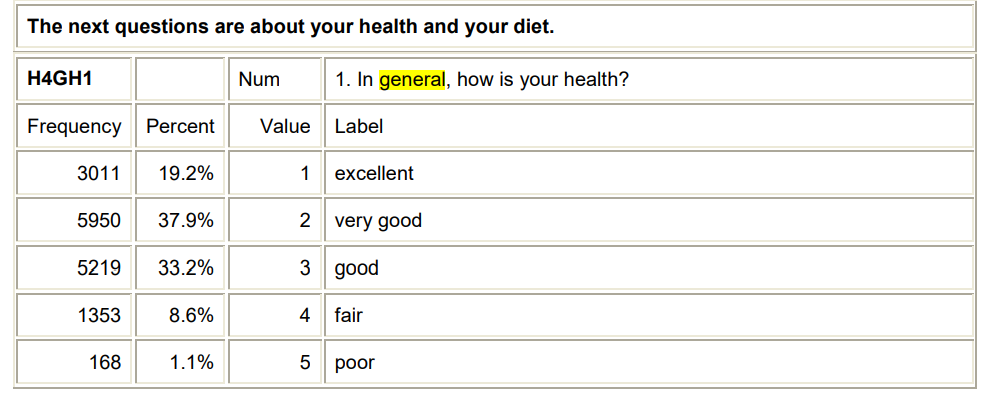

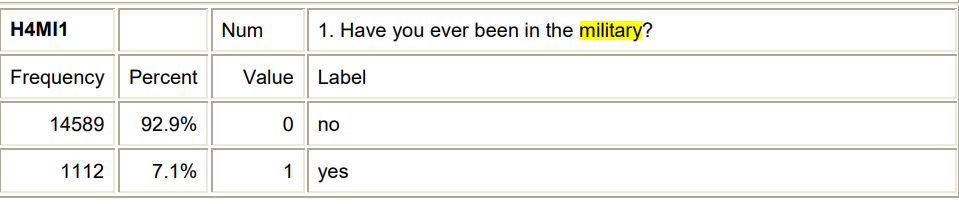



Copy existing Column to a new renamed column

In [ ]:
df['General_Health'] = df['H4GH1']
df['Military'] = df['H4MI1']

Check for and remove all missing values

In [ ]:
df['General_Health'].value_counts()

In [ ]:
df['General_Health'] = df['General_Health'].loc[df['General_Health'] != ' ']
df['General_Health'].value_counts()

Format the variables.  Rename numbers to categories.

In [ ]:
#Formatting the Variable H4GH1
df['General_Health'].replace( ['1','2','3','4','5'] , ['Excellent', 'Very Good', 'Good', 'Fair','Poor'], inplace = True)
df['General_Health'].value_counts()

In [ ]:
#Formatting the Variable H4GH1
df['Military'] = df['Military'].loc[df['Military'] != ' ' ]
df['Military'].value_counts()

In [ ]:
#Formatting the Variable H4MI1
df['Military'].replace( ['0','1',] , ['no', 'yes'] , inplace = True)
df['Military'].value_counts()

Create plots for data.

In [ ]:
import matplotlib.pyplot as plt
df['Military'].value_counts(normalize = True).plot(kind = 'barh')

In [ ]:
df['General_Health'].value_counts(normalize = True).plot( kind = 'bar')

2 Way Table of the Data with visualizations including a Stacked bar graphs and a Mosiac Plot

In [ ]:
#normalize ='index' is for row percentages,  normalize = True is for percentages
table = pd.crosstab(df['Military'], df['General_Health']  , normalize ='index' , margins=True).round(2)
table

<Figure size 720x1440 with 0 Axes>

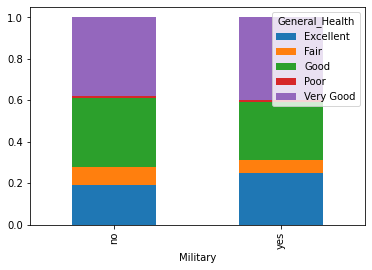

In [ ]:
#Stacked bar graph
plt.figure(figsize = (10,20))
table.plot.bar(stacked = True)
plt.show()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Military', 'General_Health'])

CHI SQUARED TEST

In [ ]:
#Chi Squared
from scipy.stats import chi2_contingency

chiVal, pVal, df, exp = chi2_contingency(table)
print("Chi-squared Value:" , chiVal)
print("P Value: " , pVal )
print("Degress or freedom : " , df)
print("Expected counts :" ,exp)